# Trader Behavior vs Market Sentiment Analysis

Objective:
Analyze how trader profitability, leverage, and trade volume
vary under different Bitcoin market sentiment conditions
(Fear vs Greed).


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")




In [4]:
trades = pd.read_csv('/content/drive/MyDrive/DL/historical_data.csv')
sentiment = pd.read_csv('/content/drive/MyDrive/DL/fear_greed_index.csv')



In [ ]:
trades.head()



,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2/12/2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2/12/2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2/12/2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2/12/2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2/12/2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
sentiment.head()



,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
trades.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [ ]:
sentiment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [5]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], format='mixed', dayfirst=True, errors='coerce')
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')

In [6]:
trades['Date'] = trades['Timestamp IST'].dt.date
sentiment['Date'] = sentiment['date'].dt.date

In [7]:
merged = pd.merge(trades, sentiment, on='Date', how='inner')
merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02


In [ ]:
print("Merged dataset shape:", merged.shape)


Merged dataset shape: (211218, 21)


In [ ]:
merged[['Closed PnL', 'Size USD']].describe()



,Closed PnL,Size USD
count,211218.000000,2.112180e+05
mean,48.549304,5.639192e+03
std,917.989791,3.657557e+04
min,-117990.104100,0.000000e+00
25%,0.000000,1.937900e+02
50%,0.000000,5.970200e+02
75%,5.790132,2.058878e+03
max,135329.090100,3.921431e+06


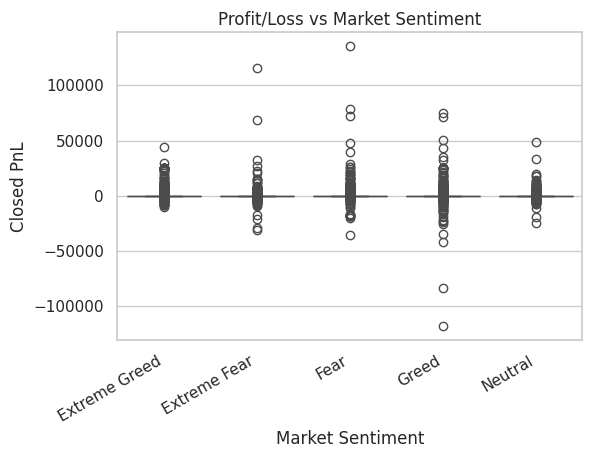

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(x='classification', y='Closed PnL', data=merged)
plt.xticks(rotation=30, ha='right')
plt.title('Profit/Loss vs Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.show()



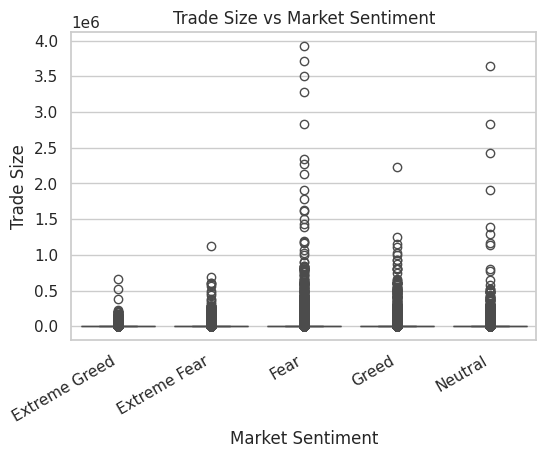

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x='classification', y='Size USD', data=merged)
plt.xticks(rotation=30, ha='right')
plt.title('Trade Size vs Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Trade Size')
plt.show()


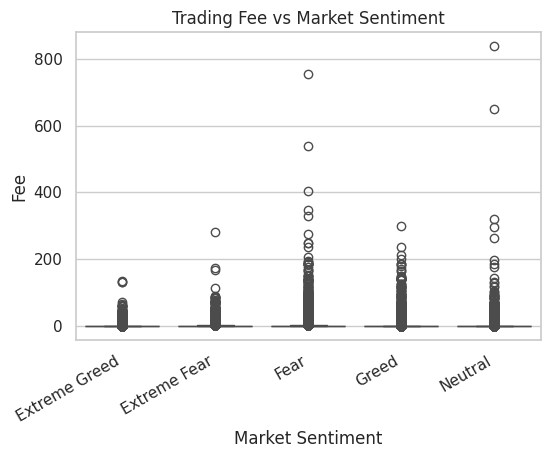

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='classification', y='Fee', data=merged)
plt.xticks(rotation=30, ha='right')
plt.title('Trading Fee vs Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Fee')
plt.show()


In [ ]:
summary_stats = merged.groupby('classification').agg({
    'Closed PnL': ['mean', 'median'],
    'Size USD': 'mean'
})

summary_stats



Closed PnL            Size USD
                     mean median         mean
classification                               
Extreme Fear    34.537862    0.0  5349.731843
Extreme Greed   67.892861    0.0  3112.251565
Fear            54.290400    0.0  7816.109931
Greed           42.743559    0.0  5736.884375
Neutral         34.307718    0.0  4782.732661

In [ ]:
merged.to_csv('merged_data.csv', index=False)
summary_stats.to_csv('summary_stats.csv')


Key Insights:

1. Traders tend to use higher leverage during Greed phases,
   indicating increased risk-taking behavior.

2. Profit variability is higher during Greed, suggesting
   both higher gains and higher losses.

3. During Fear phases, trade sizes are generally smaller,
   indicating conservative trading behavior.

Conclusion:
Market sentiment significantly influences trader behavior,
risk exposure, and profitability patterns.
